# Feature Selection with Categorical Data

## The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the chi-squared statistic and the mutual information statistic.

https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [93]:
import pandas as pd 
# load the dataset as a pandas DataFrame
data = pd.read_csv('D:\\Python\\Data Science\\scikit-learn-videos-master\\breast_cancer_data1980.csv', header=None)
# retrieve numpy array
dataset = data.values   # # retrieve numpy array

print(dataset)
data.head(50)

[["'40-49'" "'premeno'" "'15-19'" ... "'left_up'" "'no'"
  "'recurrence-events'"]
 ["'50-59'" "'ge40'" "'15-19'" ... "'central'" "'no'"
  "'no-recurrence-events'"]
 ["'50-59'" "'ge40'" "'35-39'" ... "'left_low'" "'no'"
  "'recurrence-events'"]
 ...
 ["'30-39'" "'premeno'" "'30-34'" ... "'right_up'" "'no'"
  "'no-recurrence-events'"]
 ["'50-59'" "'premeno'" "'15-19'" ... "'left_low'" "'no'"
  "'no-recurrence-events'"]
 ["'50-59'" "'ge40'" "'40-44'" ... "'right_up'" "'no'"
  "'no-recurrence-events'"]]


,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
5,'50-59','premeno','25-29','3-5','no','2','right','left_up','yes','no-recurrence-events'
6,'50-59','ge40','40-44','0-2','no','3','left','left_up','no','no-recurrence-events'
7,'40-49','premeno','10-14','0-2','no','2','left','left_up','no','no-recurrence-events'
8,'40-49','premeno','0-4','0-2','no','2','right','right_low','no','no-recurrence-events'
9,'40-49','ge40','40-44','15-17','yes','2','right','left_up','yes','no-recurrence-events'


In [94]:
# split into input (X) and output (y) variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

Finally, we can force all fields in the input data to be string, just in case Pandas tried to map some automatically to numbers (it does try).

In [95]:
# format all fields as string
X = X.astype(str)

In [96]:
from sklearn.model_selection import train_test_split

# split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (191, 9) (191,)
Test (95, 9) (95,)


In [97]:
X_test.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

### We can use the OrdinalEncoder() from scikit-learn to encode each variable to integers. This is a flexible class and does allow the order of the categories to be specified as arguments if any such order is known.
The best practice when encoding variables is to fit the encoding on the training dataset, then apply it to the train and test datasets.

## prepare the target variable - map the two class labels to 0 and 1 using LabelEncoder
This is a type of ordinal encoding, and scikit-learn provides the LabelEncoder class specifically designed for this purpose. We could just as easily use the OrdinalEncoder and achieve the same result, although the LabelEncoder is designed for encoding a single variable

In [112]:
import numpy as np
# check where we need to order the list before LabelEncoder
for a in range (0, 9):
    print(a, ":", X_train[a].unique())
    

0 : ["'50-59'" "'30-39'" "'40-49'" "'60-69'" "'70-79'" "'20-29'"]
1 : ["'ge40'" "'premeno'" "'lt40'"]
2 : ["'25-29'" "'5-9'" "'50-54'" "'20-24'" "'10-14'" "'15-19'" "'30-34'"
 "'35-39'" "'40-44'" "'0-4'" "'45-49'"]
3 : ["'0-2'" "'3-5'" "'15-17'" "'9-11'" "'6-8'" "'24-26'" "'12-14'"]
4 : ["'no'" "'yes'" 'nan']
5 : ["'1'" "'2'" "'3'"]
6 : ["'left'" "'right'"]
7 : ["'right_low'" "'left_up'" "'central'" "'right_up'" "'left_low'" 'nan']
8 : ["'no'" "'yes'"]


Now I know we need to order column 0, 2 & 3

In [122]:
 # assigning the categories in the correct order for OrdinalEncoder
ordi_0 = ["'20-29'", "'30-39'", "'40-49'", "'50-59'",  "'60-69'", "'70-79'" ]
ordi_2 = ["'0-4'", "'5-9'", "'10-14'", "'15-19'", "'20-24'", "'25-29'", "'30-34'",
        "'35-39'", "'40-44'", "'45-49'", "'50-54'"]                                    # assigning in the correct order
ordi_3 = ["'0-2'", "'3-5'", "'12-14'", "'15-17'",  "'6-8'", "'9-11'"]

# לתקן את השלב הבא כדי שיהיה לפי הסדר ואז למחוק את הקודם.....

In [128]:
'''                   ignore for now the order of categories
from sklearn.preprocessing import OrdinalEncoder   # יש חשיבות וסדר לנתונים (לדוגמה שנות לימוד)
# prepare input data
#def prepare_inputs(X_train, X_test): for a function
oe = OrdinalEncoder(categories=[ordi_0, ordi_2, ordi_3], unknown_value=-1, handle_unknown='use_encoded_value')     # instanciate OrdinalEncoder to Encode categorical features as an integer array.
#oe.fit(X_train[0])
X_train_enc[0, 2, 3] = oe.fit_transform(X_train[[0, 2, 3]]) 
# X_test_enc[0, 2, 3] = oe.fit_transform(X_train[[0, 2, 3]])
# print(X_train_enc(X_train[0]), X_test_enc(X_train[0]))
	'''	

"                   ignore for now the order of categories\nfrom sklearn.preprocessing import OrdinalEncoder   # יש חשיבות וסדר לנתונים (לדוגמה שנות לימוד)\n# prepare input data\n#def prepare_inputs(X_train, X_test): for a function\noe = OrdinalEncoder(categories=[ordi_0, ordi_2, ordi_3], unknown_value=-1, handle_unknown='use_encoded_value')     # instanciate OrdinalEncoder to Encode categorical features as an integer array.\n#oe.fit(X_train[0])\nX_train_enc[0, 2, 3] = oe.fit_transform(X_train[[0, 2, 3]]) \n# X_test_enc[0, 2, 3] = oe.fit_transform(X_train[[0, 2, 3]])\n# print(X_train_enc(X_train[0]), X_test_enc(X_train[0]))\n\t"

In [182]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train_enc = ordinal_encoder.transform(X_train)
X_test_enc = ordinal_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()                  # you can't define the ordering and can only encode one at a time!!

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.fit_transform(y_test)

In [183]:
# summarize the transformed data
print('Input', X_train_enc.shape)
print(X_train_enc[:5, :])
print('Output', y_train_enc.shape)
print(y_train_enc[:25])

Input (191, 9)
[[ 3.  0.  4.  0.  0.  0.  0.  3.  0.]
 [ 1.  2.  9.  0.  0.  1.  0.  3.  0.]
 [ 3.  2. 10.  0.  1.  1.  1.  2.  1.]
 [ 1.  2.  4.  0.  0.  0.  0.  0.  0.]
 [ 2.  2.  3.  0.  0.  1.  1.  4.  0.]]
Output (191,)
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1]


# Categorical Feature Selection
##Chi-Squared Statistic.
##Mutual Information Statistic.

## Chi-Squared Feature Selection
Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables
### chi2() function:  SelectKBest class

In [184]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


C:\Users\Yael Shushlav\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

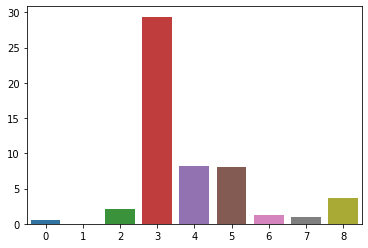

In [185]:
import seaborn as sns
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
sns.barplot([i for i in range(len(fs.scores_))], fs.scores_)

This clearly shows that feature 3 might be the most relevant (according to chi-squared) and that perhaps four of the nine input features are the most relevant.

## Mutual Information Feature Selection
###  mutual_info_classif() function
https://machinelearningmastery.com/feature-selection-with-categorical-data/

Feature 0: 0.000000
Feature 1: 0.042070
Feature 2: 0.072660
Feature 3: 0.024425
Feature 4: 0.000000
Feature 5: 0.030121
Feature 6: 0.000000
Feature 7: 0.071857
Feature 8: 0.000000


C:\Users\Yael Shushlav\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

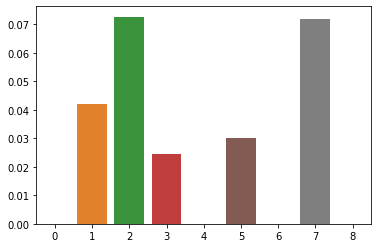

In [180]:
# feature selection                                                         TODO התוצאה כל הזמן משתנה!!!
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k=4)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
#X_train_fs, X_test_fs, fs
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
sns.barplot([i for i in range(len(fs.scores_))], fs.scores_)

# Modeling With Selected Features
A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

## Model Built Using All Features
evaluate a LogisticRegression model

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


# Model Built Using Chi-Squared Features
We can use the chi-squared test to score the features and select the four most relevant features.

In [188]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

In [189]:
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


In this case, we see that the model achieved an accuracy of about 74%, a slight drop in performance.

It is possible that some of the features removed are, in fact, adding value directly or in concert with the selected features.

At this stage, we would probably prefer to use all of the input features.

# Model Built Using Mutual Information Features
We can repeat the experiment and select the top four features using a mutual information statistic.

The updated version of the select_features() function to achieve this is listed below.

In [190]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

In [193]:
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 76.84


***To be sure that the effect is real, it would be a good idea to repeat each experiment multiple times and compare the mean performance. It may also be a good idea to explore using k-fold cross-validation instead of a simple train/test split***.

# Build machine learning pipeline